In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
city_data_raw=pd.read_csv("raw_data/city_data.csv")
city_data_df = pd.DataFrame({'type': city_data_raw.groupby('city').first()['type'],
                                'driver_count': city_data_raw.groupby('city').sum()['driver_count']}).reset_index()
city_data_df.head()




,city,driver_count,type
0,Alvarezhaven,21,Urban
1,Alyssaberg,67,Urban
2,Anitamouth,16,Suburban
3,Antoniomouth,21,Urban
4,Aprilchester,49,Urban


In [4]:
ride_data_df=pd.read_csv("raw_data/ride_data.csv")
ride_data_df.head()



,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
city_ride_df = pd.DataFrame({'Total Fare': ride_data_df.groupby('city').sum()['fare'],
                             'Total Rides': ride_data_df.groupby('city').count()["ride_id"],
                             'Average Fare': ride_data_df.groupby('city').mean()['fare']
                            }).reset_index()
city_ride_df.head()
city_ride_df=city_ride_df.merge(city_data_df, on="city" )
city_ride_df.head()


,city,Average Fare,Total Fare,Total Rides,driver_count,type
0,Alvarezhaven,23.928710,741.79,31,21,Urban
1,Alyssaberg,20.609615,535.85,26,67,Urban
2,Anitamouth,37.315556,335.84,9,16,Suburban
3,Antoniomouth,23.625000,519.75,22,21,Urban
4,Aprilchester,21.981579,417.65,19,49,Urban


In [6]:
#Setting up TYPE as  index for easy LOC operation in Bubble plot
city_ride_df.set_index("type",inplace=True)
city_ride_df.head()

,city,Average Fare,Total Fare,Total Rides,driver_count
type,,,,,
Urban,Alvarezhaven,23.928710,741.79,31,21
Urban,Alyssaberg,20.609615,535.85,26,67
Suburban,Anitamouth,37.315556,335.84,9,16
Urban,Antoniomouth,23.625000,519.75,22,21
Urban,Aprilchester,21.981579,417.65,19,49


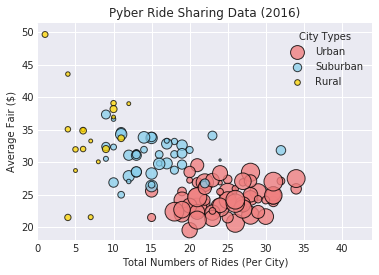

In [13]:
with plt.style.context('seaborn-dark'):
    plt.title("Pyber Ride Sharing Data (2016)")
    plt.xlim(0,max(city_ride_df["Total Rides"]+10))
    plt.xlabel("Total Numbers of Rides (Per City)")
    plt.ylabel("Average Fair ($)")
    plt.grid(color='white', linestyle='-', linewidth=1)
    Urban_handle = plt.scatter(city_ride_df.loc["Urban","Total Rides"], city_ride_df.loc["Urban","Average Fare"],edgecolors="black", color="lightcoral", label="Urban",alpha=.8,s=city_ride_df.loc["Urban","driver_count"]*5)
    Sub_handle = plt.scatter(city_ride_df.loc["Suburban","Total Rides"], city_ride_df.loc["Suburban","Average Fare"],edgecolors="black", color="skyblue", label="Suburban",alpha=0.75,s=city_ride_df.loc["Suburban","driver_count"]*5 )
    Rural_handle = plt.scatter(city_ride_df.loc["Rural","Total Rides"], city_ride_df.loc["Rural","Average Fare"], edgecolors="black",color="gold", label="Rural",alpha=0.75,s=city_ride_df.loc["Rural","driver_count"]*5)
    plt.legend(handles=[Urban_handle, Sub_handle,Rural_handle], loc="best",title="City Types")


In [14]:
city_ride_df.reset_index(inplace=True)

Text(0.5,1,'% of Total Fares by City Type')

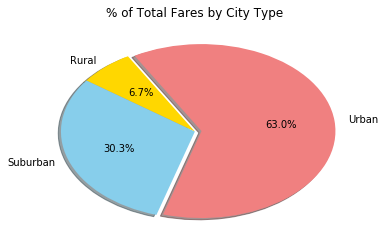

In [15]:
#plotting % of Total Fares by City Type
fare_group=city_ride_df.groupby("type").sum()["Total Fare"]
type_list=fare_group.keys()
colors=[]
explode=[]
fare_axis=[x for x in fare_group]
for x in type_list:
    if(x=="Rural"):
        colors.append("gold")
        explode.append(0)
    elif(x=="Suburban"):
        colors.append("skyblue")
        explode.append(0)
    else:
        colors.append("lightcoral")
        explode.append(0.05)
plt.pie(fare_axis, explode=explode, labels=type_list, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Fares by City Type")


Text(0.5,1,'% of Total Rides by City Type')

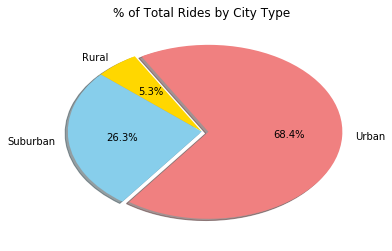

In [16]:
#plotting % of Total Rides by City Type
ride_group=city_ride_df.groupby("type").sum()["Total Rides"]
type_list=ride_group.keys()
colors=[]
explode=[]
ride_axis=[x for x in ride_group]
for x in type_list:
    if(x=="Rural"):
        colors.append("gold")
        explode.append(0)
    elif(x=="Suburban"):
        colors.append("skyblue")
        explode.append(0)
    else:
        colors.append("lightcoral")
        explode.append(0.05)
plt.pie(ride_axis, explode=explode, labels=type_list, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Rides by City Type")


Text(0.5,1,'% of Total Drivers by City Type')

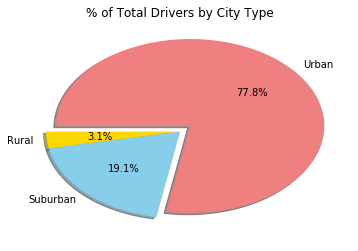

In [17]:
#plotting % of Total Drivers by City Type
d_group=city_ride_df.groupby("type").sum()["driver_count"]
type_list=d_group.keys()
colors=[]
explode=[]
d_axis=[x for x in d_group]
for x in type_list:
    if(x=="Rural"):
        colors.append("gold")
        explode.append(0)
    elif(x=="Suburban"):
        colors.append("skyblue")
        explode.append(0)
    else:
        colors.append("lightcoral")
        explode.append(0.1)
plt.pie(d_axis, explode=explode, labels=type_list, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("% of Total Drivers by City Type")